#ECE232E-Project3_Part1

##Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from cvxopt import solvers, matrix

%matplotlib inline

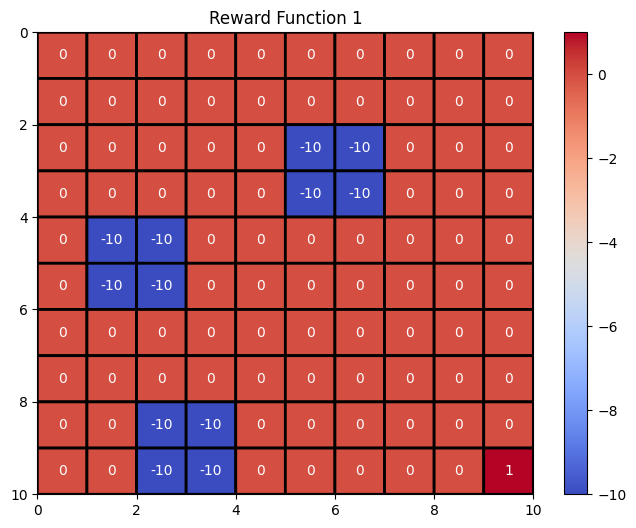

In [2]:
reward_func1 = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, -10, -10, 0, 0, 0],
    [0, 0, 0, 0, 0, -10, -10, 0, 0, 0],
    [0, -10, -10, 0, 0, 0, 0, 0, 0, 0],
    [0, -10, -10, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, -10, -10, 0, 0, 0, 0, 0, 0],
    [0, 0, -10, -10, 0, 0, 0, 0, 0, 1]
])

# Plotting the reward matrix
plt.figure(figsize=(8, 6))
plt.pcolor(reward_func1, edgecolors='k', linewidths=2, cmap='coolwarm')
plt.title("Reward Function 1")
plt.colorbar()

# Adding value labels to each cell
for (j, i), label in np.ndenumerate(reward_func1):
    plt.text(i+0.5, j+0.5, label, ha='center', va='center', color='white')

plt.gca().invert_yaxis()
plt.show()

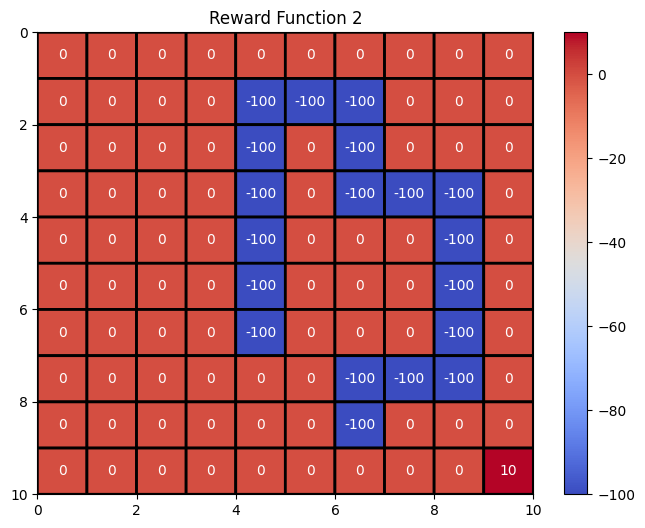

In [3]:
reward_func2 = np.array([
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, -100, -100, -100, 0, 0, 0],
                   [0, 0, 0, 0, -100, 0, -100, 0, 0, 0],
                   [0, 0, 0, 0, -100, 0, -100, -100, -100, 0],
                   [0, 0, 0, 0, -100, 0, 0, 0, -100, 0],
                   [0, 0, 0, 0, -100, 0, 0, 0, -100, 0],
                   [0, 0, 0, 0, -100, 0, 0, 0, -100, 0],
                   [0, 0, 0, 0, 0, 0, -100, -100, -100, 0],
                   [0, 0, 0, 0, 0, 0, -100, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 10]
])

# Plotting the reward matrix
plt.figure(figsize=(8, 6))
plt.pcolor(reward_func2, edgecolors='k', linewidths=2, cmap='coolwarm')
plt.title("Reward Function 2")
plt.colorbar()

# Adding value labels to each cell
for (j, i), label in np.ndenumerate(reward_func2):
    plt.text(i+0.5, j+0.5, label, ha='center', va='center', color='white')

plt.gca().invert_yaxis()
plt.show()

##Q2

In [28]:


def get_neighbors(state, state_space):
    row, col = state_space[state]
    # Determine neighbors with boundary conditions
    right_neighbor = (row, col+1) if col+1 <= 9 else (row, col)
    left_neighbor = (row, col-1) if col-1 >= 0 else (row, col)
    up_neighbor = (row-1, col) if row-1 >= 0 else (row, col)
    down_neighbor = (row+1, col) if row+1 <= 9 else (row, col)


    # Convert neighbor coordinates back to state indices
    right_index = right_neighbor[1] * 10 + right_neighbor[0]
    left_index = left_neighbor[1] * 10 + left_neighbor[0]
    up_index = up_neighbor[1] * 10 + up_neighbor[0]
    down_index = down_neighbor[1] * 10 + down_neighbor[0]

    return right_index, left_index, up_index, down_index

def get_transition_probabilities_matrix(w, actions, state_space):
    num_states = len(state_space)
    tp = {action: np.zeros((100, 100)) for action in actions}

    # Fill transition probabilities
    for state_index in range(num_states):
        neighbors = get_neighbors(state_index, state_space)
        for action_index, action in enumerate(actions):
            for neighbor_index, neighbor in enumerate(neighbors):
                tp[action][state_index, neighbor] += w / 4
                if action_index == neighbor_index:
                    tp[action][state_index, neighbor] += 1 - w

    return tp


In [29]:
# create a state_space for mapping of states numbering and coordinate
num_states = 100
state_space = dict()
for i in range(num_states):
  row = i % 10
  col = i // 10
  state_space[i] = (row, col)

num_acts = 4
act_sets = np.array(["right", "left", "up", "down"])

# reward function (#1) in 1D
rwd = reward_func1.flatten("F")

gamma = 0.8

# transition probabilities matrix with probability w
w = 0.1
tp = get_transition_probabilities_matrix(w, act_sets, state_space)

In [30]:
def optimal_state_value_function(transition_probabilities, rewards, state_space, actions, gamma, epsilon):
    # Initialize state values and control variables
    num_states = len(state_space)
    state_values = np.zeros(num_states)
    convergence_delta = np.inf
    num_iterations = 0

    # Value iteration process
    while convergence_delta > epsilon:
        convergence_delta = 0
        new_values = np.copy(state_values)
        for state_index in range(num_states):
            # Calculate the maximum expected utility for each state
            potential_values = [np.sum(transition_probabilities[action][state_index] * (rewards + gamma * state_values))
                                for action in actions]
            max_value = max(potential_values)
            # Update the state value and calculate the maximum change for convergence check
            convergence_delta = max(convergence_delta, abs(max_value - new_values[state_index]))
            new_values[state_index] = max_value

        state_values = new_values
        num_iterations += 1

    return state_values, num_iterations


Number of steps needed to converge: 22



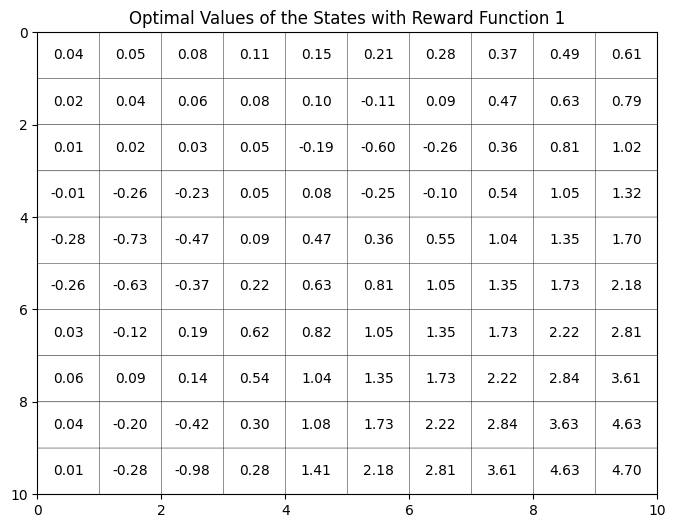

In [31]:
epsilon = 0.01
opt_state_values, num_iterations = optimal_state_value_function(tp, rwd, state_space, act_sets, gamma, epsilon)

print("Number of steps needed to converge: {}\n".format(num_iterations))

plt.figure(figsize=(8, 6))
plt.pcolor(opt_state_values.reshape((10, 10)).T, edgecolors='black',cmap=ListedColormap(['white']))
plt.title("Optimal Values of the States with Reward Function 1")

for (j, i), label in np.ndenumerate(opt_state_values.reshape((10, 10)).T):
  plt.text(i+0.5, j+0.5, '{:.2f}'.format(label), ha='center', va='center')
plt.gca().invert_yaxis()
plt.show()

In [13]:
opt_state_values

array([ 0.03601957,  0.02228448,  0.01182773, -0.00655603, -0.28277155,
       -0.25667254,  0.03150298,  0.06137129,  0.0353975 ,  0.01449238,
        0.05478216,  0.03647988,  0.01651939, -0.26208876, -0.72595241,
       -0.62563251, -0.12408103,  0.08886438, -0.20442362, -0.27502781,
        0.07971521,  0.05542631,  0.03130019, -0.23026923, -0.46954346,
       -0.36571612,  0.19323318,  0.13672673, -0.42350976, -0.98174051,
        0.11185318,  0.08006788,  0.05036259,  0.05485174,  0.08615236,
        0.21525967,  0.61793684,  0.53585092,  0.29739001,  0.27743457,
        0.15319264,  0.1019543 , -0.19085531,  0.08236758,  0.46907377,
        0.62901516,  0.81895939,  1.04295886,  1.07644007,  1.40876278,
        0.20650454, -0.11237761, -0.60410515, -0.25265714,  0.36055759,
        0.813928  ,  1.05424497,  1.35312699,  1.72761841,  2.17633205,
        0.28180223,  0.09069336, -0.25615093, -0.10289922,  0.54512447,
        1.04876847,  1.3533849 ,  1.73460904,  2.21956833,  2.80

In [32]:
def calculate_state_value_snapshots(tp, rewards, state_space, actions, discount_factor, epsilon, snapshot_interval):

    # Initialize state values, control variables, and snapshots list
    num_states = len(state_space)
    state_values = np.zeros(num_states)
    change_threshold = np.inf
    num_iterations = 0
    value_snapshots = []

    # Value iteration algorithm
    while change_threshold > epsilon:
        change_threshold = 0
        new_state_values = np.copy(state_values)
        if num_iterations % snapshot_interval == 1 and num_iterations != 0:
            value_snapshots.append(np.copy(state_values))

        for state_index in range(num_states):
            # Compute the maximum expected utility for each state
            possible_values = [np.sum(tp[action][state_index] * (rewards + discount_factor * state_values))
                               for action in actions]
            max_value = max(possible_values)
            # Update the state value and track the maximum change
            change_threshold = max(change_threshold, abs(max_value - new_state_values[state_index]))
            new_state_values[state_index] = max_value

        state_values = new_state_values
        num_iterations += 1

    return state_values, num_iterations, value_snapshots


Number of steps needed to converge: 22

5


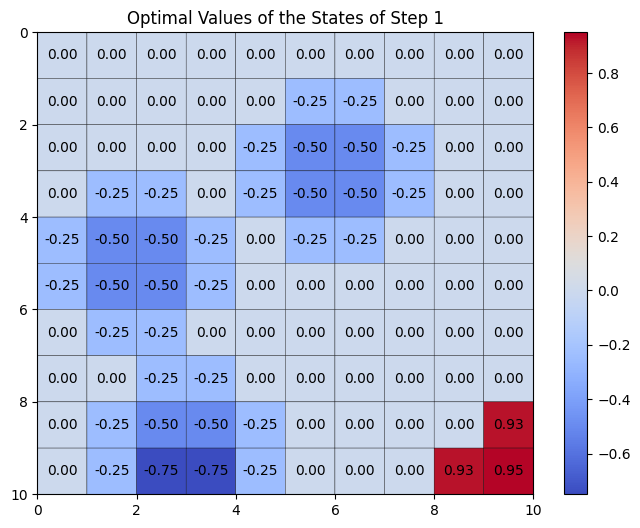

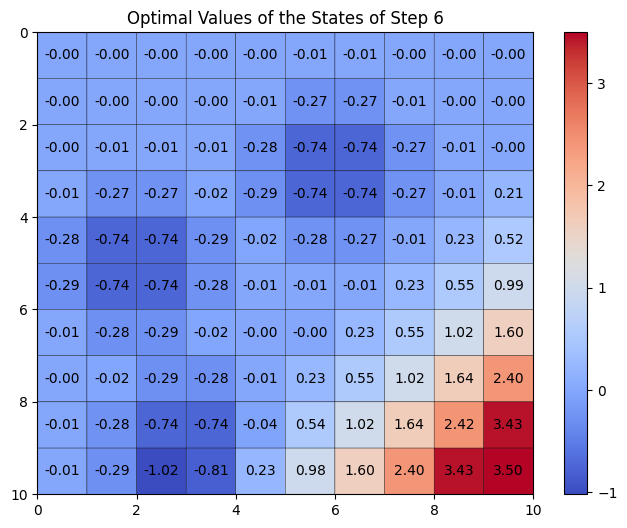

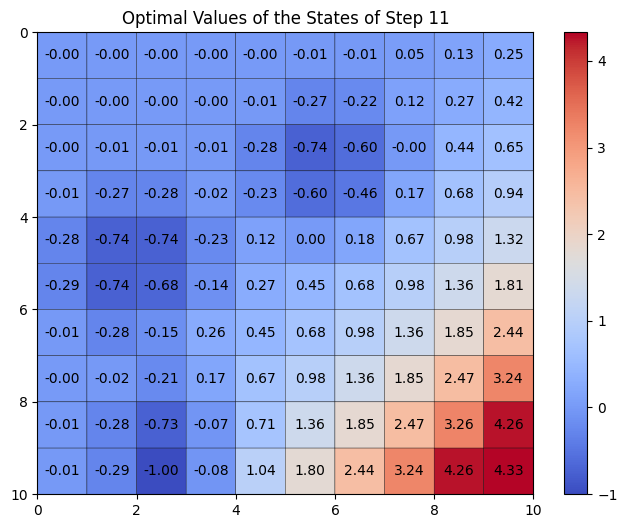

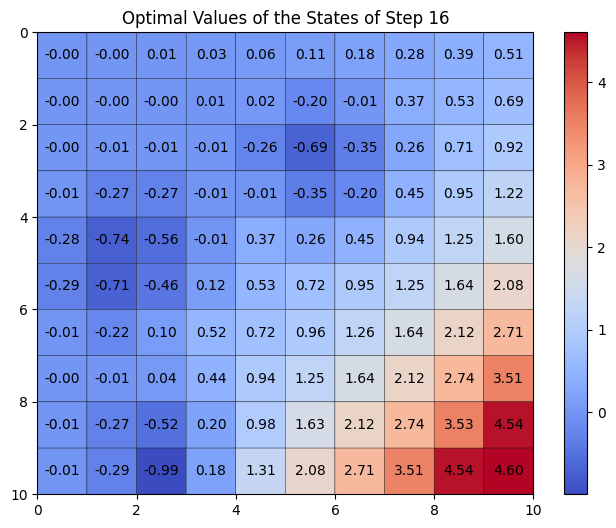

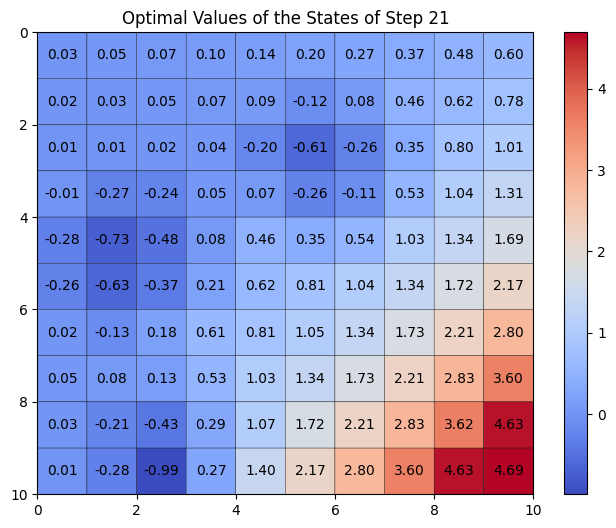

In [33]:
n = 1
step_size = 5 #22 steps to converge, take 5 snapshots evenly with step_size=5
state_values, num_iterations, value_snapshots = calculate_state_value_snapshots(tp, rwd, state_space, act_sets, gamma, epsilon, step_size)

print("Number of steps needed to converge: {}\n".format(num_iterations))
print(len(value_snapshots))

for i in range(5):
  value_snap = value_snapshots[i]
  plt.figure(figsize=(8, 6))
  plt.pcolor(value_snap.reshape((10, 10)).T, edgecolors='black',cmap='coolwarm')
  plt.title("Optimal Values of the States of Step {}".format(n))
  for (j, i), label in np.ndenumerate(value_snap.reshape((10, 10)).T):
    plt.text(i+0.5, j+0.5, '{:.2f}'.format(label), ha='center', va='center')
  n += step_size
  plt.gca().invert_yaxis()
  plt.colorbar()
  plt.show()

The images show the best state values we got from running the value iteration algorithm. It took 22 steps for the algorithm to converge, and we chose to look at steps 1, 6, 11, 16, and 21(as these steps are distributed evenly and linearly). From these images, we can see that as we go through more steps, the effects of both good and bad rewards start reaching states that are farther away. This creates a pattern where values generally go from low to high, moving from the top-left corner to the bottom-right corner of the plot. Also, the state 99, which has the only positive reward, ends up with the highest value, while states with negative rewards have the lowest values, especially when compared to nearby states that have no rewards.

#Q3

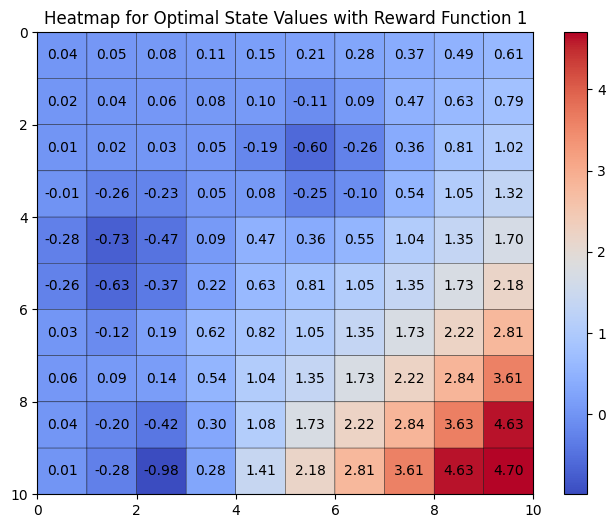

In [35]:
plt.figure(figsize=(8, 6))
plt.pcolor(opt_state_values.reshape((10, 10)).T, edgecolors='black',cmap='coolwarm')
plt.title("Heatmap for Optimal State Values with Reward Function 1")
for (j, i), label in np.ndenumerate(opt_state_values.reshape((10, 10)).T):
  plt.text(i+0.5, j+0.5, '{:.2f}'.format(label), ha='center', va='center')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

#Q4

According to the color distribution in the heatmap, it's clear that state 99 has the highest value. States farther from state 99 have lower values, which makes sense because state 99 is the only one that gives a reward. Also, states that have negative rewards show lower values compared to their neighbors that don't give any rewards. The closer a state is to these negative reward states, the lower its value tends to be. This is because being close to a negative reward state means there's a higher chance of receiving a negative reward. Taking both these observations together, we can see that the pattern in the heatmap of the best state values looks similar to the pattern in the heatmap of the reward function, but the values are more dispersed.

#Q5

In [16]:
def optimal_policy_function(transition_probabilities, rewards, state_space, actions, discount_factor, tolerance):
    num_states = len(state_space)
    state_values = np.zeros(num_states)
    policy = np.zeros(num_states, dtype=int)
    change = np.inf
    num_iterations = 0

    # Value iteration
    while change > tolerance:
        change = 0
        new_values = np.copy(state_values)
        for state_index in range(num_states):
            action_values = [np.sum(transition_probabilities[action][state_index] * (rewards + discount_factor * state_values))
                             for action in actions]
            best_value = max(action_values)
            change = max(change, abs(best_value - new_values[state_index]))
            new_values[state_index] = best_value
        state_values = new_values
        num_iterations += 1

    # Policy extraction
    for state_index in range(num_states):
        policy[state_index] = np.argmax([np.sum(transition_probabilities[action][state_index] * (rewards + discount_factor * state_values))
                                         for action in actions])

    return state_values, num_iterations, policy

def plot_policy(action_matrix):
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    arrows = {0: u'→', 1: u'←', 2: u'↑', 3: u'↓'}

    for i in range(num_rows):
        for j in range(num_rows):
            arrow = arrows.get(action_matrix[i][j], '')
            ax.text(j + 0.5, i + 0.5, arrow, va='center', ha='center', fontsize=12)

    ax.set_xlim(0, num_rows)
    ax.set_ylim(num_rows, 0)
    ax.set_xticks(np.arange(num_rows))
    ax.set_yticks(np.arange(num_rows))
    ax.xaxis.set_ticks_position('top')
    ax.grid(which='both')

    plt.show()


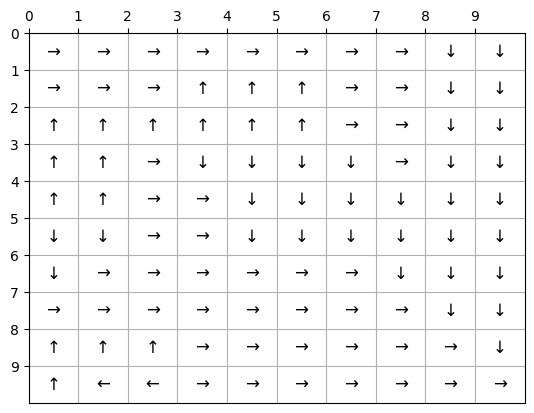

In [17]:
state_values, num_iterations, policy = optimal_policy_function(tp, rwd, state_space, act_sets, gamma, epsilon)
plot_policy(policy.reshape((10, 10)).T)

The optimal policy of the agent matches my intuition.
Based on the reward function 1 and the optimal state values we talked about earlier, it seems like the best actions should move towards the bottom-right corner and stay away from areas with negative rewards to get the best state value. We can actually see this in the plot above. If we look at how the arrows in each state point, they create a path leading towards state 99, and they curve around areas with negative rewards to avoid penalties. Also, if we put this plot showing the best actions next to the heatmap from Q3, it becomes clear how the agent figures out the best move at each state by looking at the values of the states next to it. In short, the best move for a state usually heads towards the direction where its neighbors have the highest values.

#Q6

In [37]:
num_states = 100
state_space = dict()
for i in range(num_states):
  row = i % 10
  col = i // 10
  state_space[i] = (row, col)

num_acts = 4
act_sets = np.array(["right", "left", "up", "down"])

# reward function 2
rwd = reward_func2.flatten("F")

gamma = 0.8
w = 0.1
tp = get_transition_probabilities_matrix(w, act_sets, state_space)

Number of steps needed to converge: 32



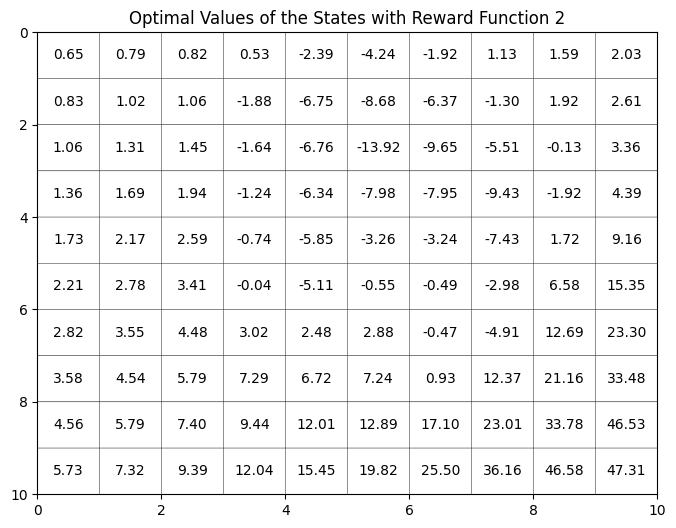

In [38]:
epsilon = 0.01
opt_state_values, num_iterations = optimal_state_value_function(tp, rwd, state_space, act_sets, gamma, epsilon)

print("Number of steps needed to converge: {}\n".format(num_iterations))

plt.figure(figsize=(8, 6))
plt.pcolor(opt_state_values.reshape((10, 10)).T, edgecolors='black', cmap=ListedColormap(['white']))
plt.title("Optimal Values of the States with Reward Function 2")

for (j, i), label in np.ndenumerate(opt_state_values.reshape((10, 10)).T):
  plt.text(i+0.5, j+0.5, '{:.2f}'.format(label), ha='center', va='center')
plt.gca().invert_yaxis()
plt.show()

#Q7

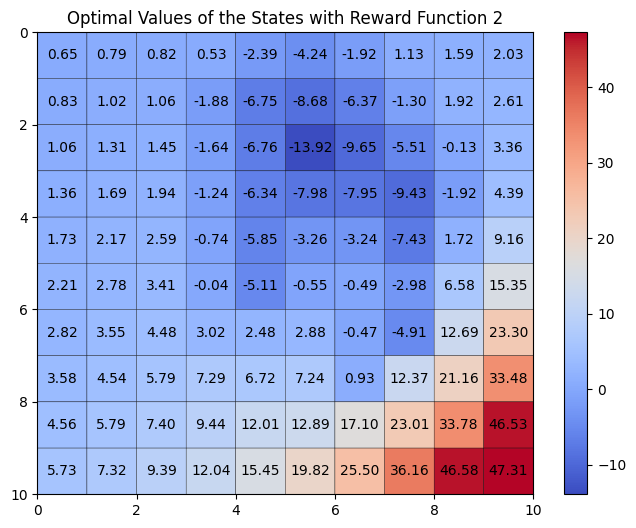

In [39]:
plt.figure(figsize=(8, 6))
plt.pcolor(opt_state_values.reshape((10, 10)).T, edgecolors='black', cmap='coolwarm')
plt.title("Optimal Values of the States with Reward Function 2")

for (j, i), label in np.ndenumerate(opt_state_values.reshape((10, 10)).T):
  plt.text(i+0.5, j+0.5, '{:.2f}'.format(label), ha='center', va='center')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

As we can see from the above heatmap of reward function 2, the distribution of the optimal state values in this heatmap looks quite similar to the heatmap from reward function 1, except that the values from reward function 2 are distributed more evenly than reward function 1. The last state also has the highest value and states farther from it have lower values, which makes sense because it's the only one that gives a reward. Also, states that have negative rewards show lower values compared to their neighbors that don't give any rewards.
 This makes sense because the closer a state is to a place with a positive or negative reward, the higher or lower its best value will be. This happens because of the impact of the positive or negative rewards. It's also worth noticing that the position with the lowest optimal state value is not the position with lowest reward, as it's surrounded by many states with low rewards.

#Q8

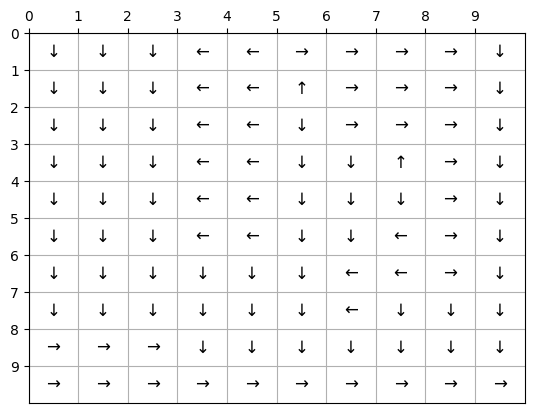

In [40]:
state_values, num_iterations, policy = optimal_policy_function(tp, rwd, state_space, act_sets, gamma, epsilon)
plot_policy(policy.reshape((10, 10)).T)

The optimal policy of the agent shown in the above plot matches my intuition. Similar to the intuition we talked about for reward function 1, we can get the intuition from reward function 2's optimal states values that the overall movement of the optimal policy should move toward bottom-right corner, staying away from negative reward regions in order to reach the maximal optimal state values. This movement pattern can be seen in the above plot.

#Q9

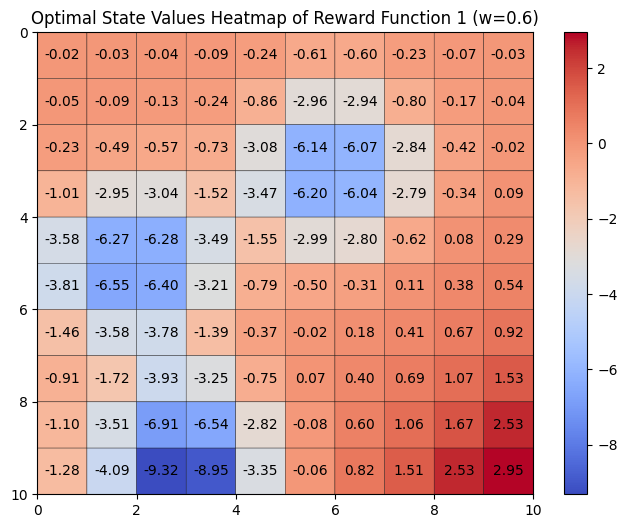

In [41]:
#reward function 1

rwd = reward_func1.flatten("F")
gamma = 0.8
w = 0.6
tp = get_transition_probabilities_matrix(w, act_sets, state_space)
epsilon = 0.01
opt_state_values, num_iterations = optimal_state_value_function(tp, rwd, state_space, act_sets, gamma, epsilon)

plt.figure(figsize=(8, 6))
plt.pcolor(opt_state_values.reshape((10, 10)).T, edgecolors='black',cmap='coolwarm')
plt.title("Optimal State Values Heatmap of Reward Function 1 (w=0.6)")
for (j, i), label in np.ndenumerate(opt_state_values.reshape((10, 10)).T):
  plt.text(i+0.5, j+0.5, '{:.2f}'.format(label), ha='center', va='center')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

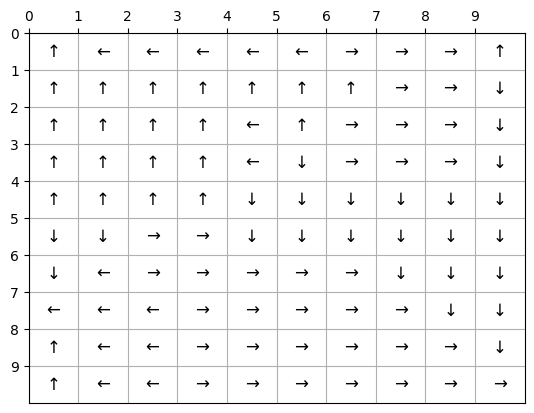

In [42]:
state_values, num_iterations, policy = optimal_policy_function(tp, rwd, state_space, act_sets, gamma, epsilon)
plot_policy(policy.reshape((10, 10)).T)

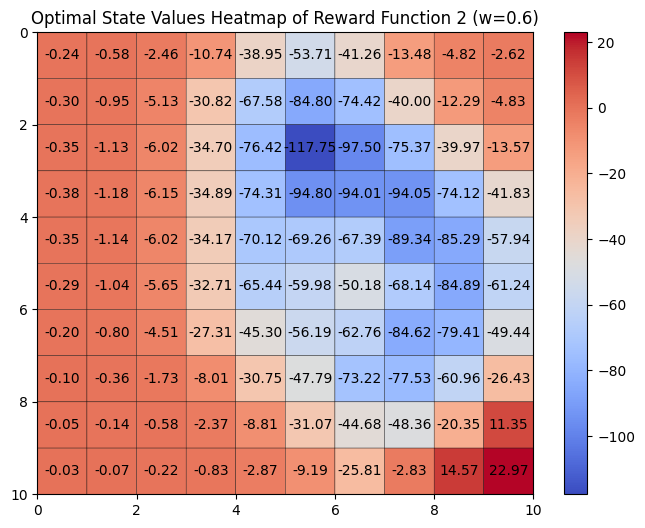

In [43]:
#reward function 2

rwd = reward_func2.flatten("F")
gamma = 0.8
w = 0.6
tp = get_transition_probabilities_matrix(w, act_sets, state_space)
epsilon = 0.01
opt_state_values, num_iterations = optimal_state_value_function(tp, rwd, state_space, act_sets, gamma, epsilon)

plt.figure(figsize=(8, 6))
plt.pcolor(opt_state_values.reshape((10, 10)).T, edgecolors='black',cmap='coolwarm')
plt.title("Optimal State Values Heatmap of Reward Function 2 (w=0.6)")
for (j, i), label in np.ndenumerate(opt_state_values.reshape((10, 10)).T):
  plt.text(i+0.5, j+0.5, '{:.2f}'.format(label), ha='center', va='center')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

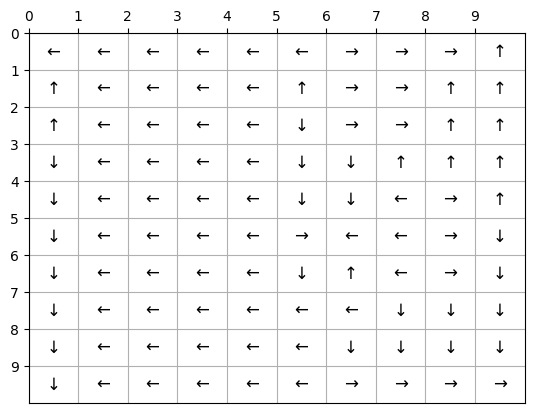

In [44]:
state_values, num_iterations, policy = optimal_policy_function(tp, rwd, state_space, act_sets, gamma, epsilon)
plot_policy(policy.reshape((10, 10)).T)


The results using a w of 0.6 with reward functions 1 and 2 are shown above. We can see that the best state values with both reward functions are lower than those with w=0.1, especially for state 99 and its nearby states.  Also, the areas with negative values become larger, which can be seen from the colors on the heatmap. This happens because the higher w is, the more likely it is to move randomly, which means a lower expected reward, especially near the negative reward states.

Therefore, from these observations, we find that a w of 0.1 is better because the agent is more likely to head towards the positive reward and can explore more of the grid. So we decided to choose w=0.1 for the following parts.